# Salvar un DataFrame en Google Sheets
> "ฅ^•ﻌ•^ฅ Para poder comunicarlo al público en general"

- toc: false
- branch: master
- badges: true
- comments: true
- author: Matías Battocchia
- categories: [pandas]

Este es uno de los mejores trucos que aprendí trabajando en [Mutt Data](https://muttdata.ai). Del lado del desarrollo, en el día a día, trabajar con Pandas es de lo más común, tanto para análisis exploratorio de datos como manipulación de datos en general. Cuando existen otras partes interesadas en un proyecto, sobre todo personas de negocio, la comunicación es de lo más importante y en Mutt nos iba bastante bien sacando a la luz `DataFrame`s por medio de Google Sheets — ambos están hechos para trabajar con datos tabulares y lo bueno de los documentos de Google es que son fáciles de compartir y que las personas de negocio están acostumbradas a interactuar con hojas de cálculo.

El paquete que vamos a usar se llama [gspread](https://gspread.readthedocs.io) y es una API en Python para Google Sheets.

    pip install gspread

## Autenticación

Vamos a necesitar una cuenta de servicio —que es un archivo con credenciales— para habilatar a nuestro programa a escribir en Google Sheets. Estas son las instrucciones.

1. Ir a la [consola](https://console.cloud.google.com) de Google Cloud Platform (GCP) y crear un proyecto nuevo o seleccionar uno existente (yo creé `mi-proyecto`). Si nunca usaste GCP, vas a tener algunos pasos adicionales.
2. En la barra de *Buscar productos y recursos* buscar **Google Drive API** y habilitarla.
3. En la barra de *Buscar productos y recursos* buscar **Google Sheets API** y habilitarla.
4. En la barra de *Buscar productos y recursos* buscar **cuentas de servicio**, en esa página:
  5. **+ Crear cuenta de servicio**, completar el formulario; con el nombre de la cuenta de servicio es suficiente (yo elegí `google-sheets`).
  6. Una vez creada, seleccionarla para entrar en los detalles de la cuenta.
  7. `Claves > Agregar clave > Crear clave nueva > JSON > Crear`. Aceptar la descarga de la cuenta de servicio.
  8. Mover el archivo a la carpeta de trabajo. Debe estar en lugar seguro.

La cuenta de servicio servirá para todas las planillas de cálculo que necesitemos dentro de un mismo proyecto de GCP.

## Acceso a la hoja de cálculo

Este paso es mucho muy importante, **debe realizarse cada vez que utilicemos una hoja de cálculo nueva**.

Ir a la hoja de cálculo y compartirla con el correo electrónico de la cuenta de servicio (es el que figura en el detalle de la cuenta) de la misma manera que haríamos para compartírsela a otra persona mediante su cuenta de correo.

En mi caso, tengo que compartir las hojas con `google-sheets@mi-proyecto.iam.gserviceaccount.com`.


## Pandas

Este es la función que utilizo para escribir un `DataFrame` en Google Sheets. Hay algunas conversiones de tipos de datos, ya que Pandas y Google Sheets no manejan los mismos tipos.

In [9]:
import gspread

GSHEETS_CREDENTIALS = 'mi-proyecto-80a030363d28.json'


def save_to_gsheets(df, sheet_name, worksheet_name='Sheet1'):
    client = gspread.service_account(GSHEETS_CREDENTIALS)
    sheet = client.open(sheet_name)

    worksheet = sheet.worksheet(worksheet_name)

    # convertimos el tipo de las columnas que sean datetime a string
    for column in df.columns[df.dtypes == 'datetime64[ns]']:
        df[column] = df[column].astype(str)

    # reemplazamos valores NaN por strings vacíos
    worksheet.update([df.columns.values.tolist()] + df.fillna('').values.tolist())

    print(f'DataFrame escrito en la hoja {sheet_name} / {worksheet_name}.')

Vamos con un ejemplo:

In [5]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.randint(0, 100, size=(7, 4)), columns=list('ABCD'))

df

,A,B,C,D
0,80,61,9,52
1,17,98,55,77
2,4,52,5,99
3,3,93,36,99
4,99,45,51,39
5,69,62,3,23
6,93,34,90,88


Previamente tuve que crear la hoja `Ejemplo Pandas` y darle acceso a la cuenta de servicio.

In [10]:
save_to_gsheets(df, 'Ejemplo Pandas', worksheet_name='Sheet1')

DataFrame escrito en la hoja Ejemplo Pandas / Sheet1.


Este es el resultado 📝.

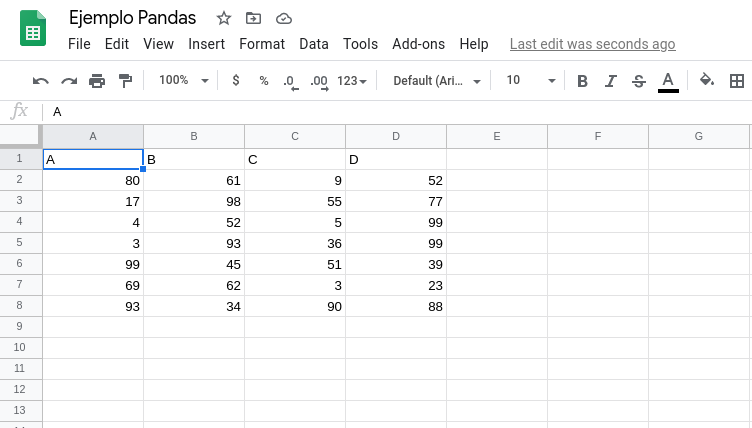